# Retail Data Wrangling and Analytics

In [1]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load Data from PSQL into DataFrame

**Setup Docker Containers**

![](https://i.imgur.com/VQrBVBk.jpg)

```
#make sure you have both Jupyter and PSQL docker container running
docker ps

#Attach a bridge network to both containers so they can communicate with each other
docker network create jarvis-net
#this command works on running containers
docker network connect jarvis-net jarvis-jupyter
docker network connect jarvis-net jarvis-psql

#verify both containers are attached to the jarvis-net
docker network inspect trading-net

#Note: instead of using `localhost`, you should use container names as hostnames.
```

**Data Preperation**

- Use [pandas.read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html) api to load the PSQL retail table into a Pandas DataFrame

![](https://i.imgur.com/AmkAP63.jpg)

- Get familair with the transaction date with `df.head()`, `df.sample(10)`, `df.info()`, `df.describe()`, etc..



In [2]:
#install psql "driver"
!pip3 install psycopg2-binary

In [3]:
#Interested in looking in to how to get this working, but I found a tutorial that gets the job done a different way
#engine_string = ""
#engine = ""
#retail_df = pd.read_sql('retail',)
#retail_df.head()
import psycopg2
# Connection parameters
param_dic = {
    "host"      : "pythonWrangles",
    "database"  : "postgres",
    "user"      : "postgres",
    "password"  : "password"
}
def connect(params_dic):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn



In [4]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tuples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [5]:
# Connect to the database
conn = connect(param_dic)
column_names = ["invoice_no", "stock_code", "description", "quantity","invoice_date","unit_price","customer_id","country"]
# Execute the "SELECT *" query
retail_df = postgresql_to_dataframe(conn, "select * from retail", column_names)
retail_df.head()

Connecting to the PostgreSQL database...
Connection successful


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
retail_df.info()
retail_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


,quantity,unit_price,customer_id
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


# Load CSV into Dataframe (Another Option)
The same information present in the PostgreSQL database was also provided in .csv format. For learning purposes, this is how it would be handled. To gurantee the headers are the same as in the .sql version, we can specify
them as we load the .csv. Also note how we need to inform Pandas what the data types of certain fields are.

In [7]:
headers = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price','customer_id','country']
dtypes = {'quantity':'int64','unit_price':'float64','customer_id':'float64'}
parse_dates = ['invoice_date']
retail_df_csv = pd.read_csv('online_retail_II.csv',header=None, skiprows=1, names=headers, dtype=dtypes, parse_dates=parse_dates)
retail_df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [8]:
retail_df_csv.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# Total Invoice Amount Distribution

In [9]:
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

Minimum:0.19
Mean:523.30
Median:304.32
Mode:15.00
Maximum:168469.60



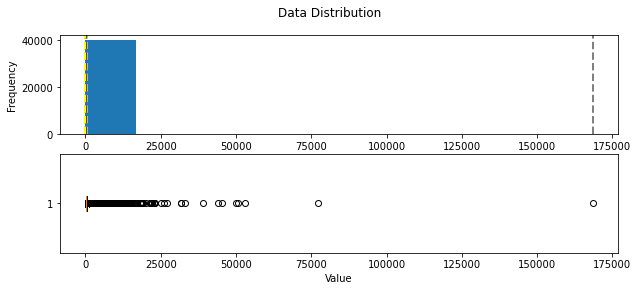

In [10]:
retail_df = retail_df[(retail_df.unit_price > 0) & (retail_df.quantity > 0)]
retail_df["total_cost"] = retail_df["quantity"] * retail_df["unit_price"]
retail_df_grouped = retail_df.groupby([retail_df.invoice_no]).sum()
col = retail_df_grouped["total_cost"]
col.head()
show_distribution(col)

Minimum:0.19
Mean:271.68
Median:256.24
Mode:15.00
Maximum:724.25



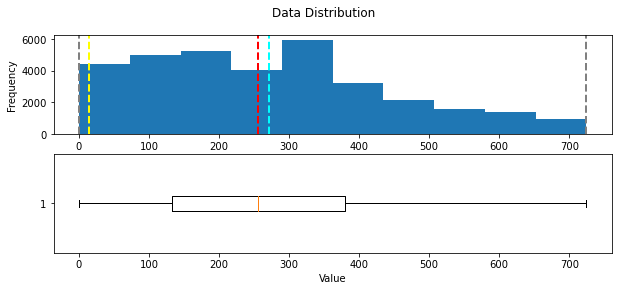

In [11]:
q85 = retail_df_grouped["total_cost"].quantile(0.85)
col85 = retail_df_grouped["total_cost"][retail_df_grouped.total_cost<q85]
col85.head()
show_distribution(col85)

# Monthly Placed and Canceled Orders

In [12]:
retail_df = postgresql_to_dataframe(conn, "select * from retail", column_names)
retail_df["yyyymm"] = retail_df["invoice_date"].dt.year.apply(str) + retail_df["invoice_date"].dt.month.map("{:02}".format).apply(str)
retail_df["yyyymm"].apply(int)

0          200912
1          200912
2          200912
3          200912
4          200912
            ...  
1067366    201112
1067367    201112
1067368    201112
1067369    201112
1067370    201112
Name: yyyymm, Length: 1067371, dtype: int64

In [13]:
retail_df.isnull().sum()

invoice_no           0
stock_code           0
description       4382
quantity             0
invoice_date         0
unit_price           0
customer_id     243007
country              0
yyyymm               0
dtype: int64

In [14]:
df1 = pd.DataFrame()

df1["yyyymm"] = retail_df["yyyymm"]
df1["invoice_no"] = retail_df["invoice_no"]

df1 = df1[df1['invoice_no'].str.contains("C")]
df1.head()

,yyyymm,invoice_no
178,200912,C489449
179,200912,C489449
180,200912,C489449
181,200912,C489449
182,200912,C489449


In [15]:
df1 = df1.groupby(df1.yyyymm).nunique()
df1.head()

,invoice_no
yyyymm,
200912,401
201001,300
201002,240
201003,407
201004,304


In [16]:
df2 = pd.DataFrame()
df2["yyyymm"] = retail_df["yyyymm"]
df2["invoice_no"] = retail_df["invoice_no"]

df2 = df2.groupby(df2.yyyymm).nunique()
df2.head()


,invoice_no
yyyymm,
200912,2330
201001,1633
201002,1969
201003,2367
201004,1892


In [17]:
df3 = pd.merge(df1,df2,how = 'right',on = 'yyyymm')
df3.invoice_no_x.fillna(0)
df3.head()

,invoice_no_x,invoice_no_y
yyyymm,,
200912,401,2330
201001,300,1633
201002,240,1969
201003,407,2367
201004,304,1892


In [18]:
df3.isnull().sum()

invoice_no_x    0
invoice_no_y    0
dtype: int64

(0.0, 4000.0)

<Figure size 1440x1584 with 0 Axes>

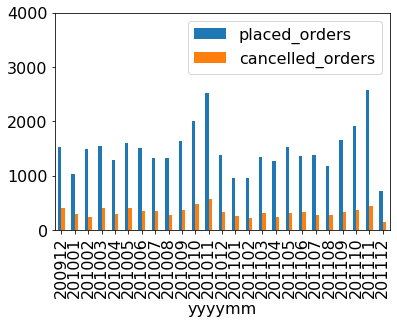

In [88]:
monthlyOrders = pd.DataFrame({"placed_orders":df3["invoice_no_y"] - 2*df3["invoice_no_x"],
                             "cancelled_orders":df3["invoice_no_x"]},index = df3.index)
monthlyOrders.head()
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(20,22)
monthlyOrders[['placed_orders','cancelled_orders']].plot(kind='bar')
plt.ylim((0,4000))

# Monthly Sales

In [20]:
def plotTimeSeries(xx,yy,title,xlabel,ylabel):
    # Create a bar plot of YYYYMM vs Revenue
    plt.bar(x=xx, height=yy, color='orange')

    # Customize the chart
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

In [21]:
retail_df["total_revenue"] = retail_df["quantity"] * retail_df["unit_price"]
rev_df = pd.DataFrame()
rev_df["yyyymm"] = retail_df["yyyymm"]
rev_df["total_revenue"] = retail_df["total_revenue"]
rev_df = rev_df.groupby(rev_df.yyyymm).sum()
rev_df.head()

,total_revenue
yyyymm,
200912,799847.110
201001,624032.892
201002,533091.426
201003,765848.761
201004,590580.432


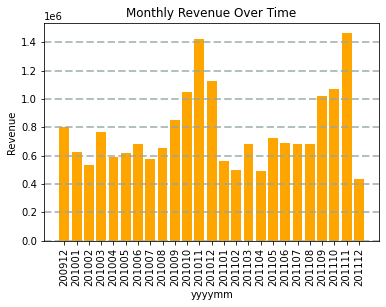

In [22]:
plotTimeSeries(rev_df.index,rev_df.total_revenue,"Monthly Revenue Over Time","yyyymm","Revenue")

# Monthly Sales Growth


In [23]:
revenue_growth_df = rev_df.pct_change() 
revenue_growth_df = revenue_growth_df.dropna(axis=0, how='any')

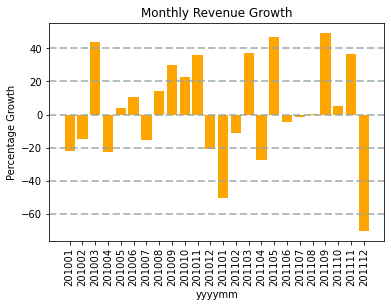

In [24]:
# Create a bar plot of YYYYMM vs Revenue growth
plotTimeSeries(revenue_growth_df.index,revenue_growth_df.total_revenue * 100,"Monthly Revenue Growth","yyyymm","Percentage Growth")

# Monthly Active Users

In [25]:
active_users_df = pd.DataFrame()
active_users_df["yyyymm"] = retail_df["yyyymm"]
active_users_df["customer_id"] = retail_df["customer_id"]
active_users_df = active_users_df.groupby(active_users_df.yyyymm).nunique()
active_users_df.head()

,customer_id
yyyymm,
200912,1045
201001,786
201002,807
201003,1111
201004,998


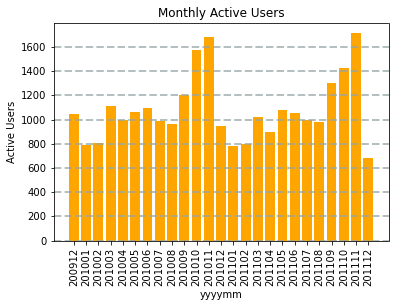

In [26]:
plotTimeSeries(active_users_df.index,active_users_df.customer_id,"Monthly Active Users", "yyyymm","Active Users")

# New and Existing Users



In [27]:
firstUserTimes = pd.DataFrame({"yyyymm_starting":retail_df["yyyymm"],"customer_id":retail_df["customer_id"]})
firstUserTimes = firstUserTimes.groupby(firstUserTimes.customer_id).min()
firstUserTimes.head()

,yyyymm_starting
customer_id,
12346.0,200912
12347.0,201010
12348.0,201009
12349.0,200912
12350.0,201102


In [28]:
test = pd.merge(retail_df,firstUserTimes,how = 'left',on = 'customer_id')
test.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,yyyymm,total_revenue,yyyymm_starting
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.8,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0,200912


In [29]:
users_monthly = pd.DataFrame({"new_users":test["customer_id"].where(test["yyyymm"] == test["yyyymm_starting"]).groupby(test.yyyymm).nunique(),
                             "existing_users":test["customer_id"].where(test["yyyymm"] != test["yyyymm_starting"]).groupby(test.yyyymm).nunique()})
users_monthly.head()

,new_users,existing_users
yyyymm,,
200912,1045,0
201001,394,392
201002,363,444
201003,436,675
201004,291,707


<AxesSubplot:xlabel='yyyymm'>

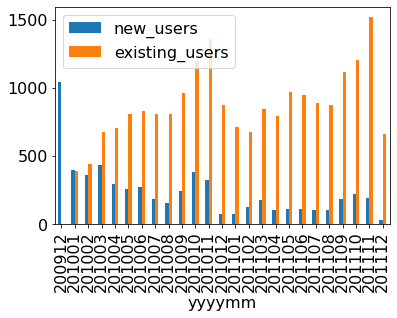

In [76]:
plt.rcParams.update({'font.size': 16})
#plt.figure(figsize=(18, 9))
users_monthly[['new_users','existing_users']].plot(kind='bar')


## Finding RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in the retail and professional services industries. ([wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research)))

Optional Reading: [Making Your Database Pay Off Using Recency Frequency and Monetary Analysis](http://www.dbmarketing.com/2010/03/making-your-database-pay-off-using-recency-frequency-and-monetary-analysis/)


RFM stands for three dimensions:

- Recency – How recently did the customer purchase?

- Frequency – How often do they purchase?

- Monetary Value – How much do they spend?

Note: To simplify the problem, let's keep all placed and canceled orders.


**Sample RFM table**

![](https://i.imgur.com/sXFIg6u.jpg)

# RFM Segmentation

In [31]:
#to make the assessment easier, today's date is set as January 1, 2012.  
today = pd.datetime(2012,1,1)

<ipython-input-31-0eaa94370240>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = pd.datetime(2012,1,1)


In [32]:
retail_df.dropna(inplace = True)

In [33]:
retail_df.shape

(824364, 10)

In [34]:
retail_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,yyyymm,total_revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0


In [35]:
retail_df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
quantity,824364.0,12.414574,188.976099,-80995.0,-2.00,1.00,1.00,2.00,5.00,12.00,24.00,36.0,120.00,80995.0
unit_price,824364.0,3.676800,70.241388,0.0,0.29,0.42,0.55,1.25,1.95,3.75,6.75,8.5,14.95,38970.0
customer_id,824364.0,15324.638504,1697.464450,12346.0,12422.00,12681.00,12971.00,13975.00,15255.00,16797.00,17713.00,17911.0,18207.00,18287.0
total_revenue,824364.0,20.195317,308.685001,-168469.6,-10.20,0.85,1.65,4.25,11.25,19.50,35.40,66.0,198.00,168469.6


In [36]:
# finding Recency and Monetary values.
df_x = retail_df.groupby('customer_id').agg({'total_revenue': lambda x: x.sum(), #monetary value
                                        'invoice_date': lambda x: (today - x.max()).days}) #recency value

In [37]:
df_y = retail_df.groupby(['customer_id','invoice_no']).agg({'total_revenue': lambda x: x.sum()})
df_z = df_y.groupby('customer_id').agg({'total_revenue': lambda x: len(x)}) 
#df_z now has the number of orders made by each customer over their entire purchase history

In [38]:
#creating the RFM table (inner join)
rfm_table= pd.merge(df_x,df_z, on='customer_id')

In [39]:
#determination of column names
rfm_table.rename(columns= {'invoice_date': 'Recency',
                          'total_revenue_y': 'Frequency',
                          'total_revenue_x': 'Monetary'}, inplace= True)

In [40]:
rfm_table.head()
#some monetary fields can be negative because there were a lot of null customer_id fields,
#meaning a customer could have bought something anonymously, then returned it under a customer_id
#looking at customer_id = 12346.0 specifically, they had a huge order they cancelled, so rounding
#error is another distinct possibility

,Monetary,Recency,Frequency
customer_id,,,
12346.0,-64.68,347,17.0
12347.0,5633.32,24,8.0
12348.0,2019.40,97,5.0
12349.0,4404.54,40,5.0
12350.0,334.40,332,1.0


In [41]:
#RFM score values; qcut automatically maps scores to kth ntile of dataset
rfm_table['RecencyScore'] = pd.qcut(rfm_table['Recency'],5,labels=[5,4,3,2,1])
rfm_table['FrequencyScore'] = pd.qcut(rfm_table['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_table['MonetaryScore'] = pd.qcut(rfm_table['Monetary'],5,labels=[1,2,3,4,5])

In [42]:
rfm_table.head()

,Monetary,Recency,Frequency,RecencyScore,FrequencyScore,MonetaryScore
customer_id,,,,,,
12346.0,-64.68,347,17.0,2,5,1
12347.0,5633.32,24,8.0,5,4,5
12348.0,2019.40,97,5.0,3,3,4
12349.0,4404.54,40,5.0,5,3,5
12350.0,334.40,332,1.0,2,1,2


In [43]:
#RFM score values are combined side by side in str format
(rfm_table['RecencyScore'].astype(str) + 
 rfm_table['FrequencyScore'].astype(str) + 
 rfm_table['MonetaryScore'].astype(str)).head()

customer_id
12346.0    251
12347.0    545
12348.0    334
12349.0    535
12350.0    212
dtype: object

In [44]:
#calculation of the RFM score
rfm_table["RFM_SCORE"] = rfm_table['RecencyScore'].astype(str) + rfm_table['FrequencyScore'].astype(str) + rfm_table['MonetaryScore'].astype(str)

In [45]:
rfm_table.head()

,Monetary,Recency,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
customer_id,,,,,,,
12346.0,-64.68,347,17.0,2,5,1,251
12347.0,5633.32,24,8.0,5,4,5,545
12348.0,2019.40,97,5.0,3,3,4,334
12349.0,4404.54,40,5.0,5,3,5,535
12350.0,334.40,332,1.0,2,1,2,212


In [46]:
#transposition of the RFM table. This makes it easier to evaluate.
rfm_table.describe().T

,count,mean,std,min,25%,50%,75%,max
Monetary,5942.0,2801.799459,13973.922553,-25111.09,325.0975,843.97,2182.005,598215.22
Recency,5942.0,224.457085,211.881245,22.00,46.0000,117.50,403.000,760.00
Frequency,5942.0,7.552339,15.972262,1.00,2.0000,4.00,8.000,510.00


In [47]:
#segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [48]:
#creation of segment variable
rfm_table['Segment'] = rfm_table['RecencyScore'].astype(str) + rfm_table['FrequencyScore'].astype(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(seg_map, regex=True)

In [49]:
#Segment classification may not make intuitive sense if you look at Monetary, since
#our RFM -> Segment mapping doesn't take M into account
rfm_table.head()

,Monetary,Recency,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
customer_id,,,,,,,,
12346.0,-64.68,347,17.0,2,5,1,251,Can't Lose
12347.0,5633.32,24,8.0,5,4,5,545,Champions
12348.0,2019.40,97,5.0,3,3,4,334,Need Attention
12349.0,4404.54,40,5.0,5,3,5,535,Potential Loyalists
12350.0,334.40,332,1.0,2,1,2,212,Hibernating


In [53]:
rfm_table[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(["mean","count"])

Recency        Frequency            Monetary      
                           mean count       mean count          mean count
Segment                                                                   
About to Sleep       129.689474   380   1.460526   380    492.810900   380
At Risk              398.094415   752   4.672872   752   1157.449162   752
Can't Lose           343.305882    85  17.717647    85   5725.638494    85
Champions             29.512850   856  23.532710   856  10510.937634   856
Hibernating          487.237785  1535   1.336808  1535    340.030536  1535
Loyal Customers       89.149565  1150  11.941739  1150   3966.024762  1150
Need Attention       135.395604   273   3.673993   273   1099.877403   273
New Customers         31.814815    54   1.000000    54    362.463148    54
Potential Loyalists   46.674764   741   2.967611   741    899.359865   741
Promising             59.758621   116   1.000000   116    322.758966   116


# Remark:
3 segments selected for evaluation are "Can't Lose", "Hibernating" and "Champions".

**Number of customers for segments:**

Can't Lose = 85, Hibernating = 1535, Champions = 856

- Can't Lose Segment:

    - The last shopping date of the customers is on average 343 days before the first day after the last day in the provided data (January 1st, 2020).
    - Customers have made an average of 17.7 purchases.
    - Customers spent an average of £ 5725.64.

- Hibernating Segment:

    - The last shopping date of the customers is on average 487 days before the first day after the last day in the provided data (January 1st, 2020).
    - Customers made an average of 1 purchases.
    - Customers spent an average of £ 340.
    
- Champions Segment:

    - The last shopping date of the customers is on average 30 days before the first day after the last day in the provided data (January 1st, 2020).
    - Customers made an average of 24 purchases.
    - Customers spent an average of £ 10510.94.

- Can't Lose Segment:

    - Customers in this segment have not recently made a purchase. For this reason, we need to prepare a discount and gift campaign for this segment. These customers made a large number of purchases when they made purchases before. However, recency values are lower than they should be. The campaign to be implemented for these customers should include both items purchased and recommendations based on previous activities. New and popular products associated with the products that they were interested in can also be included in this campaign. Situations that will cause these customers to stop buying need to be investigated.

- Hibernating Segment:

    - Customers in this segment have not made a purchase for a long time. However, by offering discounts, they may be attracted to another purchase.

- Champions Segment:

    - Customers in this segment are responsible for most of the revenue. Campaigns should be implemented to ensure the continuity of the shopping of these customers.

## Resources:

https://docs.exponea.com/docs/rfm-segmentation

Recency and Frequency Grid Image: https://clevertap.com/blog/automate-user-segmentation-with-rfm-analysis/

In [51]:
#pip install squarify
import squarify

In [57]:
squarestuff = rfm_table[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").count()


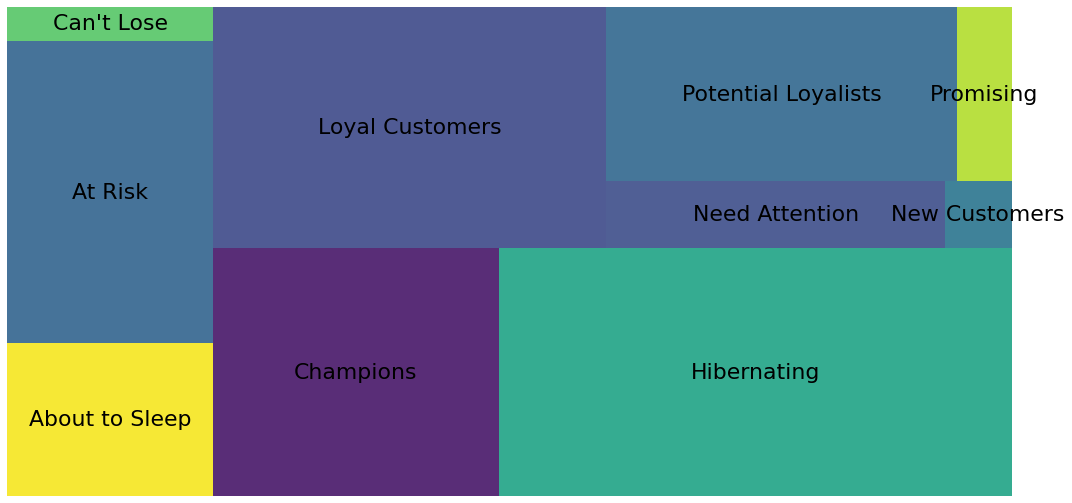

In [69]:
plt.figure(figsize=(18, 9))
squarify.plot(sizes=squarestuff['Recency'], label=squarestuff.index, alpha=.9)
plt.axis('off')
plt.rcParams.update({'font.size': 202})
plt.show()